<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/Swap_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixray Settings demo

This version of the notebook is setup to easily change the rendering model that draws the image, as well as update other settings before running.

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

%%capture
# this patch applied to fix torchtext dependency 11 Nov 2021
!pip install torch==1.9.0+cu111 torchtext==0.10.0 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/

!git clone https://github.com/openai/CLIP
# !pip install taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!rm -Rf pixray
!git clone https://github.com/dribnet/pixray
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops
!pip install torch-optimizer
!pip install easydict
!pip install braceexpand
!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir steps
!mkdir models
!wget https://user-images.githubusercontent.com/945979/126260797-adc60317-9518-40de-8700-b1f93e81e0ec.png -O this_is_fine.png
!wget https://user-images.githubusercontent.com/945979/126415385-d70ff2b0-f021-4238-9621-6180d33b242c.jpg -O perfume.jpg

import sys
sys.path.append("pixray")

In [ ]:
#@title Easy Settings

#@markdown Let's take a prompt and try drawing with a number
#@markdown of different models. The models we will be using are
#@markdown VQGAN models which mainly differ on the trained data
#@markdown and architecture. Swapping the model will make the result
#@markdown look differnt. For example: "wikiart" is trained on
#@markdown artwork and so draws things more arty. ¯\\_(ツ)_/¯

#@markdown Best bet: just try different models out and see what happens.

prompts = "strange aura in the style of Theodor Severin Kittelsen" #@param {type:"string"}

vqgan_model = "wikiart_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

quality = "best" #@param ["draft", "normal", "better", "best"]

aspect = "widescreen" #@param ["widescreen", "square"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and we can then run it below.

# Simple setup from menu choices
import pixray
pixray.reset_settings()
pixray.add_settings(prompts=prompts, vqgan_model=vqgan_model)
pixray.add_settings(quality=quality, aspect=aspect)
pixray.add_settings(display_clear=True)

## Sneak in some more settings? (optional)

The code block below is a chance to sneak in some last settings before we start the code. For example, you can set the drawer to "pixel" or used a fixed random number seed. This allows us to mix and match the best settings discussed in differnt notebooks.

Make sure you click the play button below *after* running the easy settings above if you want to make any of these modifications before running.

In [ ]:
# examples below start with '#" are comments and do not get run

# pixray.add_settings(init_image="file.png")
# pixray.add_settings(init_image_alpha=200)
# pixray.add_settings(overlay_image="file.png")
# pixray.add_settings(image_prompts="file.png")
# pixray.add_settings(overlay_every=20)
# pixray.add_settings(seed=42)
# pixray.add_settings(display_every=50)
# pixray.add_settings(iterations=200)
# pixray.add_settings(size=[256, 256])
# pixray.add_settings(vector_prompts="textoff")

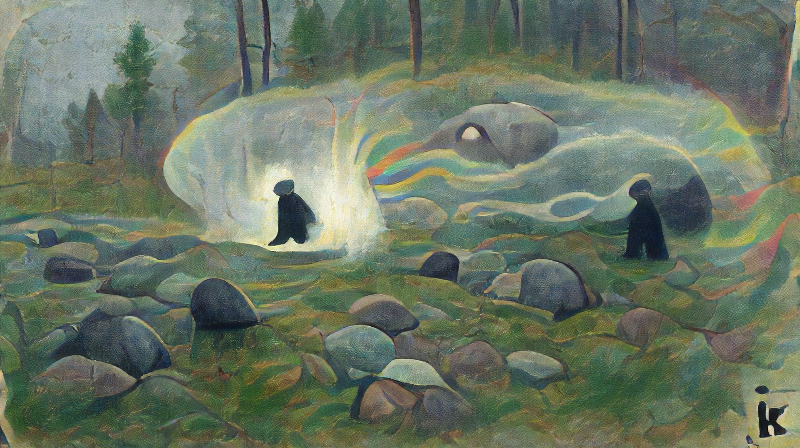

iter: 340, loss: 1.84, losses: 0.565, 0.649, 0.625 (-30=>1.833)
iter: 350, finished (-4=>1.816)


True

In [ ]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run any model it takes a bit
#@markdown longer because the model has to download when needed.

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
